# Updating Kontext with mask images

In [2]:
import torch
from diffusers import FluxKontextInpaintPipeline
from diffusers.utils import load_image

pipe = FluxKontextInpaintPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-Kontext-dev",
    torch_dtype=torch.bfloat16
)
pipe.to("cuda")

Loading checkpoint shards: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 100.70it/s]

Loading pipeline components...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 16.83it/s]


FluxKontextInpaintPipeline {
  "_class_name": "FluxKontextInpaintPipeline",
  "_diffusers_version": "0.35.0.dev0",
  "_name_or_path": "black-forest-labs/FLUX.1-Kontext-dev",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [2]:
#import torch
#from diffusers import FluxKontextInpaintPipeline
#from diffusers.utils import load_image#

#pipe = FluxKontextInpaintPipeline.from_pretrained(
#    "black-forest-labs/FLUX.1-Kontext-dev",
#    torch_dtype=torch.bfloat16
#)
#pipe.to("cuda")

# Load your images
image = load_image("input_data/4.png")         # RGB image
mask  = load_image("input_data/4_mask_text.png").convert("L")  # Grayscale mask

# Run inpainting
prompt = "Replace only the text 'CALZADO' for 'ROPA' "
result = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask,
    guidance_scale=5,
    #width=1920,   
    #height=500,  
    num_inference_steps=40
).images[0]




100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:19<00:00,  2.02it/s]


(1920, 528)


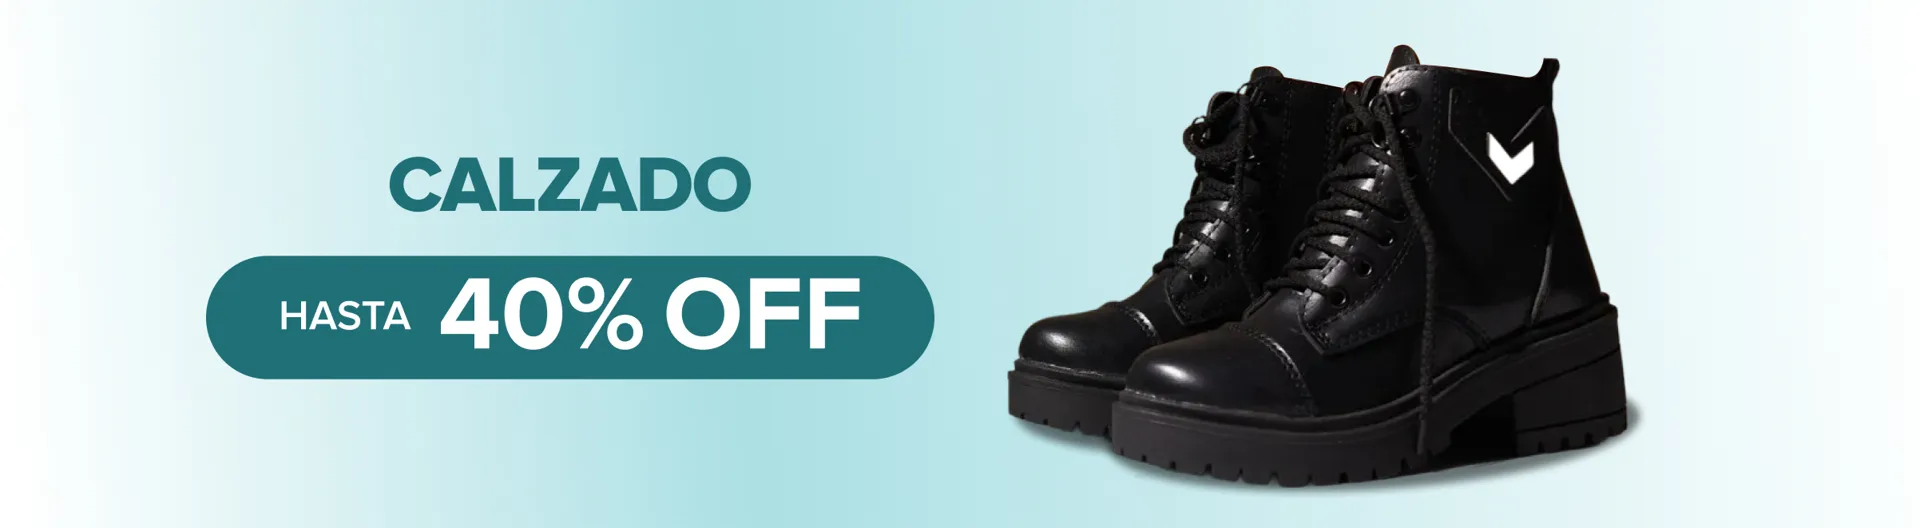

In [3]:
print(image.size)
image


(1920, 528)


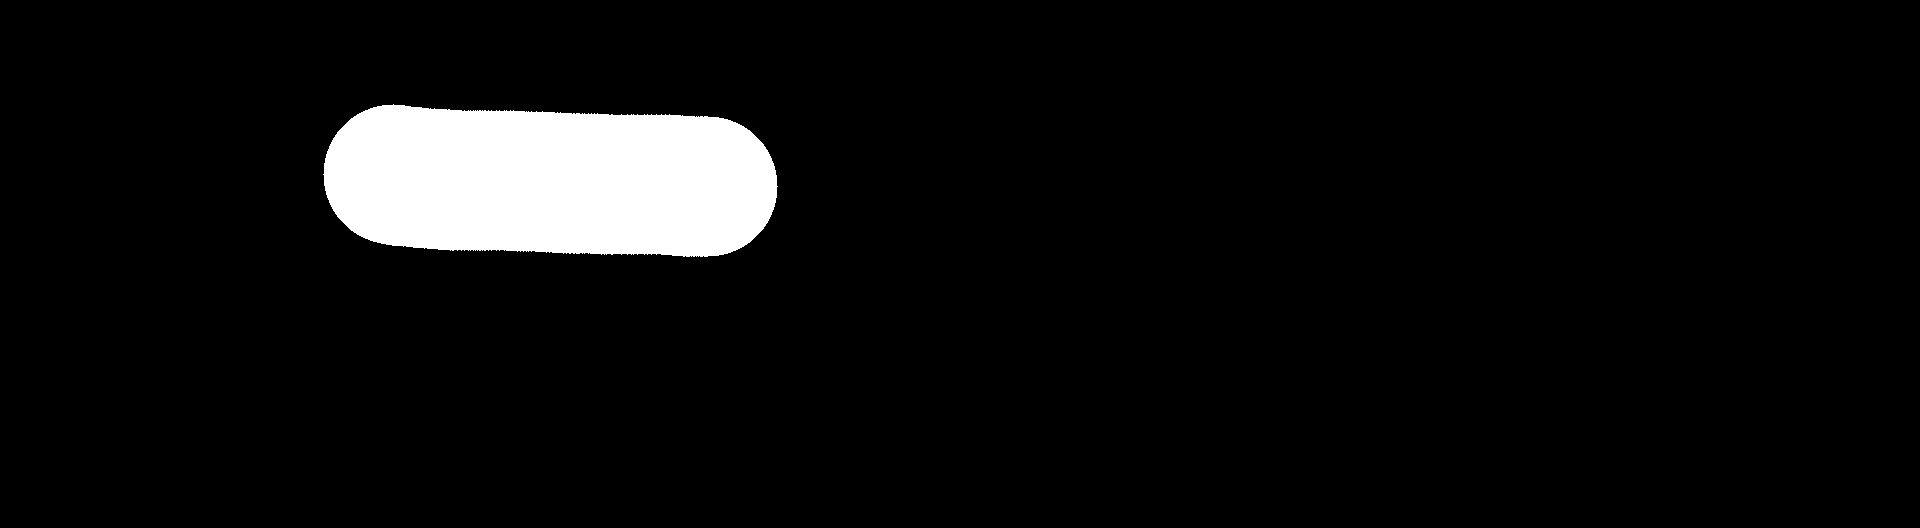

In [4]:
print(mask.size)
mask

Final result size: (1920, 528)


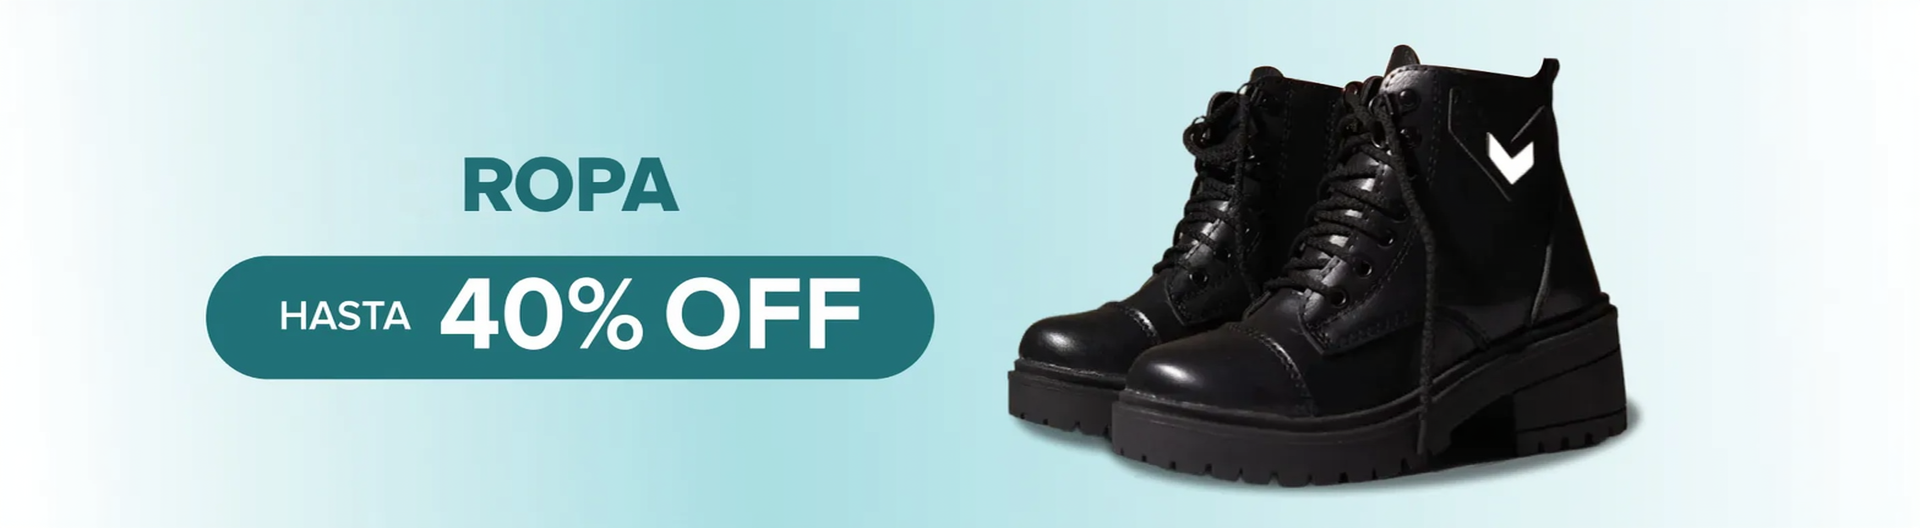

In [5]:
from PIL import Image  

# Resize the result back to the original input image size
result_resized = result.resize(image.size, Image.LANCZOS)

# Optional: Show or save
print(f"Final result size: {result_resized.size}")
result_resized.save("input_data/4_output_resized.png")
result_resized


In [6]:
#import torch
#from diffusers import FluxKontextInpaintPipeline
#from diffusers.utils import load_image

#pipe = FluxKontextInpaintPipeline.from_pretrained(
#    "black-forest-labs/FLUX.1-Kontext-dev",
#    torch_dtype=torch.bfloat16
#)
#pipe.to("cuda")

# Load your images
image = load_image("input_data/4_output_resized.png")         # RGB image
mask  = load_image("input_data/4_mask.png").convert("L")  # Grayscale mask

# Run inpainting
prompt = "Replace only the black shoes with a black jacket. Keep the rest of the image exactly the same."


prompt = (
    "Replace only the black shoes with a realistic black jacket in the same location. "
    "Ensure the jacket is well-integrated into the scene with accurate shadows, lighting, and perspective. "
    "Do not modify the rest of the image; preserve the background, composition, and style and other objects."
)

result = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask,
    guidance_scale=3,
    #width=1920,   
    #height=500,  
    num_inference_steps=100
).images[0]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:49<00:00,  2.01it/s]


(1920, 528)


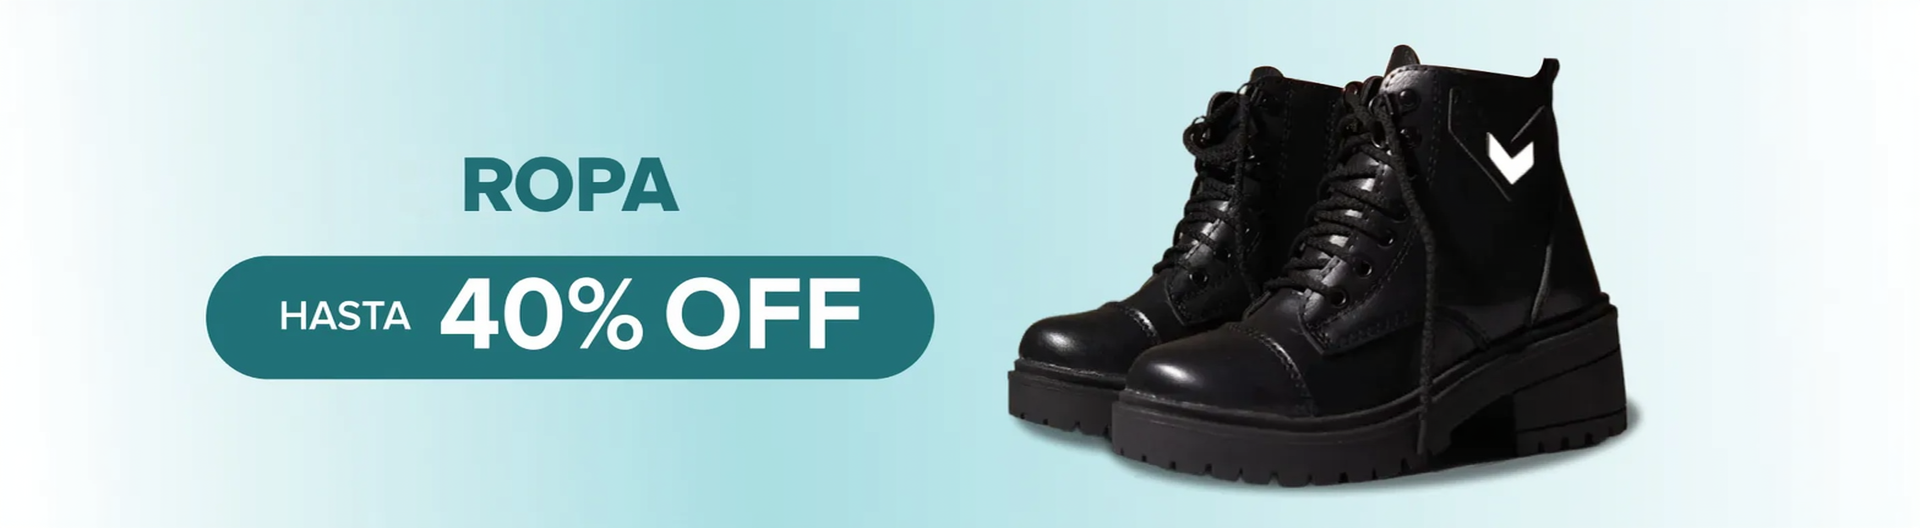

In [7]:
print(image.size)
image

(1920, 528)


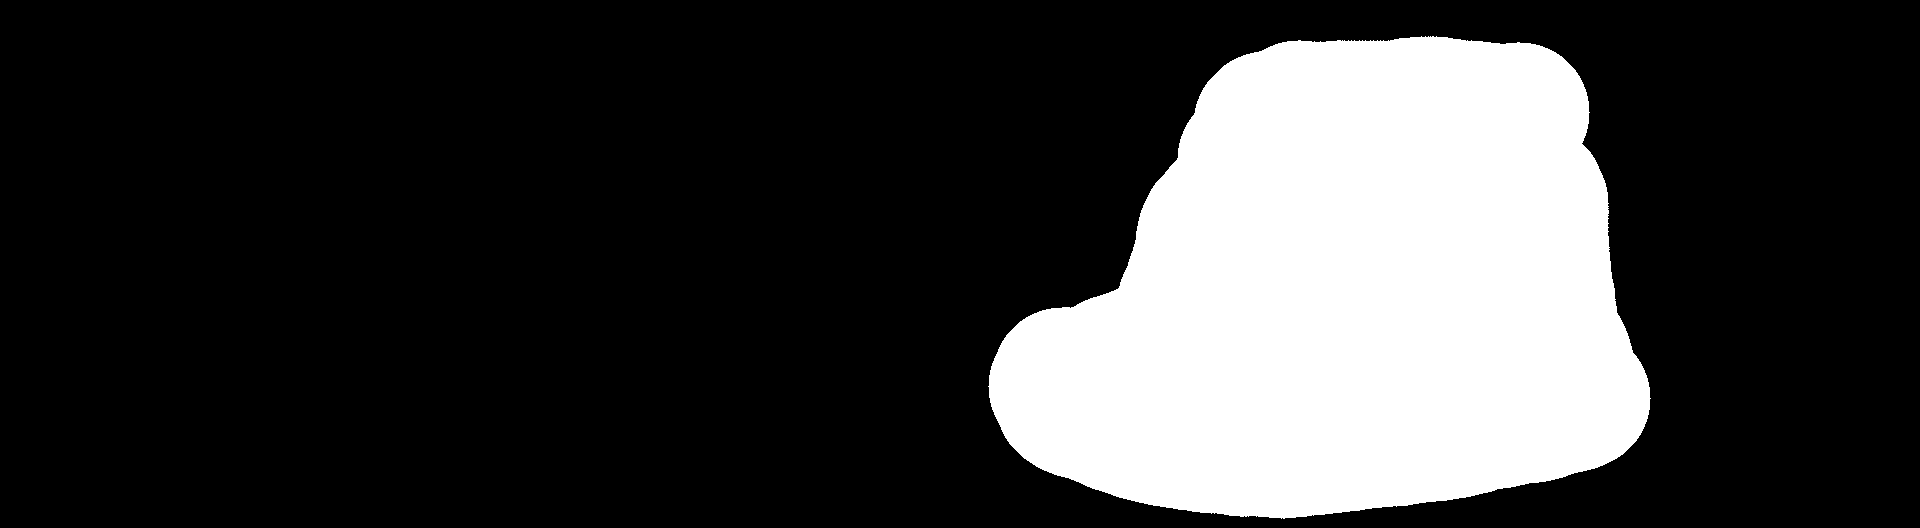

In [8]:
print(mask.size)
mask

Final result size: (1920, 528)


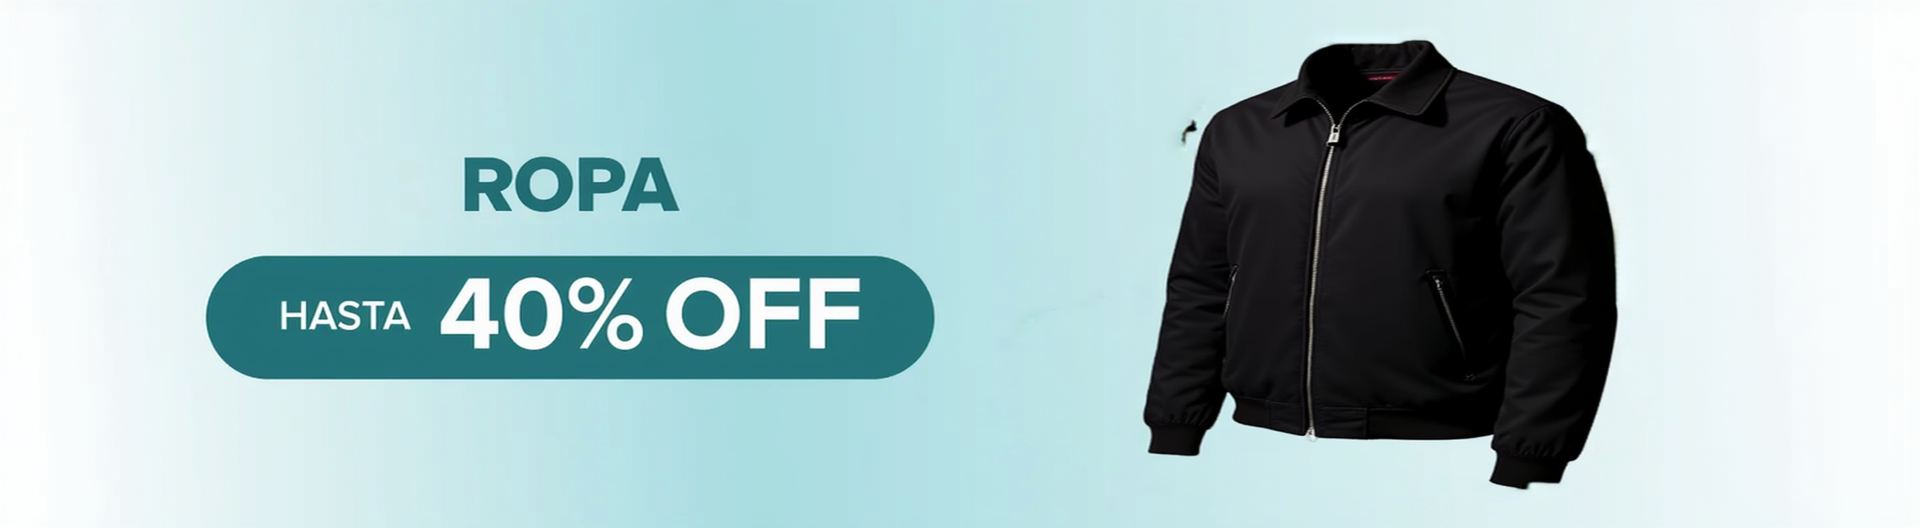

In [9]:
from PIL import Image  

# Resize the result back to the original input image size
result_resized_2 = result.resize(image.size, Image.LANCZOS)

# Optional: Show or save
print(f"Final result size: {result_resized_2.size}")
result_resized_2.save("input_data/4_output_resized_2.png")
result_resized_2


## Resultado Final

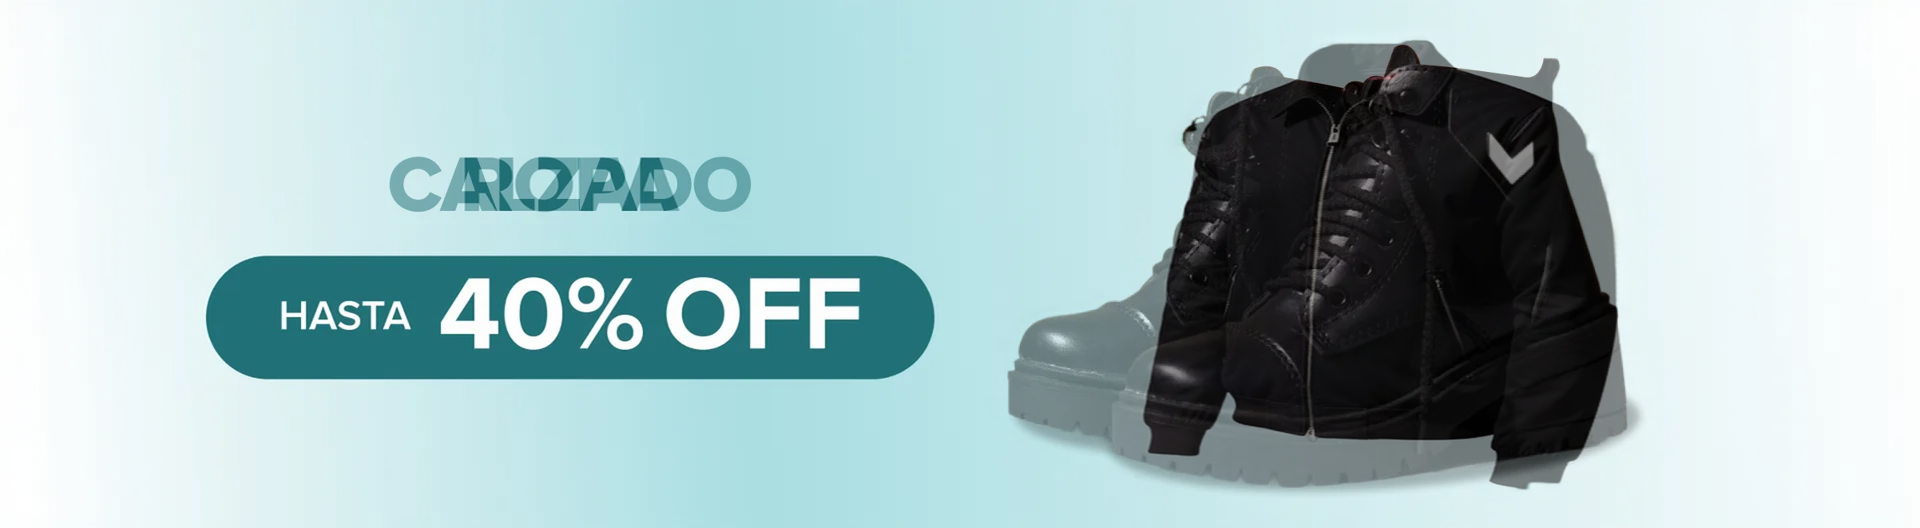

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

# === Load the images ===
img_original = Image.open("input_data/4.png").convert("RGBA")
img_result = Image.open("input_data/4_output_resized_2.png").convert("RGBA")

# === Blend the images (50% transparency) ===
blended = Image.blend(img_original, img_result, alpha=0.5)

blended


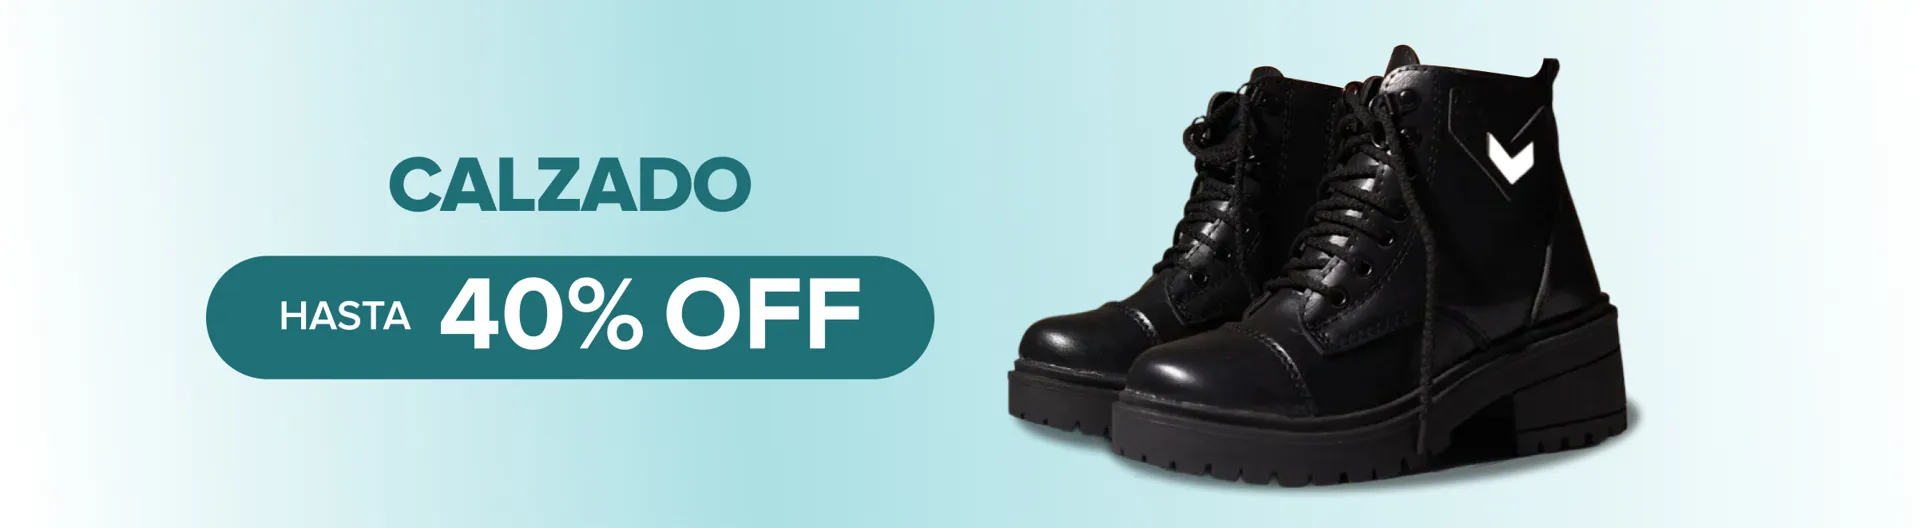

In [11]:
img_original

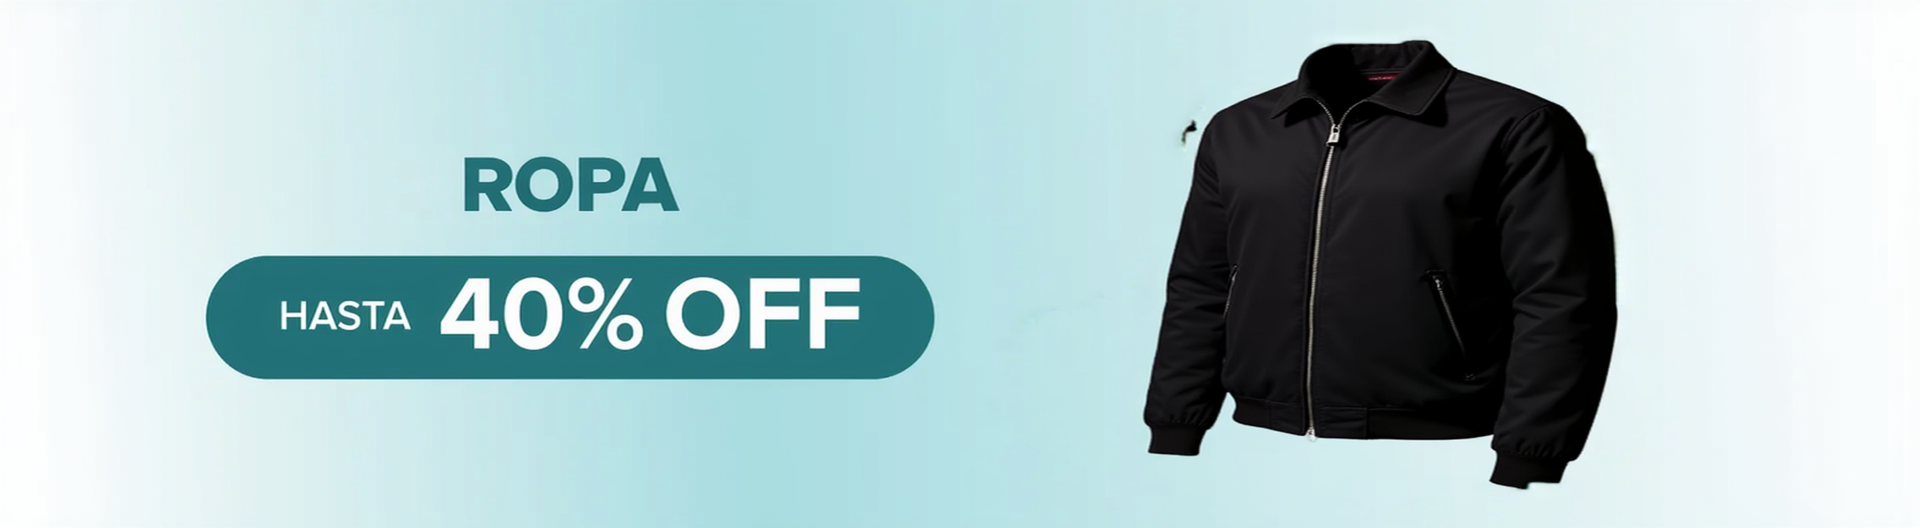

In [12]:
img_result